# Importing all the libraries needed to import the data

In [26]:
# Importing all necessary libraries is done here
import pandas as pd 
import re 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import joblib
import matplotlib.pyplot as plt 
from sklearn.utils import resample
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv('Data/Chats/Chats.csv')
df.head(10)

,Unnamed: 0,Account,Chats
0,0,Rufaro,Yo are the guys back from school
1,1,Anotida nzenze,I am in watsomaba at the moment left nyanga y...
2,2,Anotida nzenze,Are u going to buhera
3,3,Rufaro,Probably no
4,4,Rufaro,Hey how are you
5,5,Rufaro,are you still broke? my brother
6,6,Anotida nzenze,Where do you expect me to get the money
7,7,Anotida nzenze,You will be at work?
8,8,Rufaro,<Media omitted>
9,9,Anotida nzenze,Iwe people are printing their own staff😂😂


# Cleaning the data

In [3]:
len(df)

7270

In [3]:
# Function to remove trailing white spaces 
def clean_text(text):
    return text.strip()

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7233 entries, 0 to 7269
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7233 non-null   int64 
 1   Account     7233 non-null   object
 2   Chats       7233 non-null   object
dtypes: int64(1), object(2)
memory usage: 226.0+ KB


In [4]:
df['Chats'] = df['Chats'].apply(clean_text)
df.head(10)

,Unnamed: 0,Account,Chats
0,0,Rufaro,Yo are the guys back from school
1,1,Anotida nzenze,I am in watsomaba at the moment left nyanga ye...
2,2,Anotida nzenze,Are u going to buhera
3,3,Rufaro,Probably no
4,4,Rufaro,Hey how are you
5,5,Rufaro,are you still broke? my brother
6,6,Anotida nzenze,Where do you expect me to get the money
7,7,Anotida nzenze,You will be at work?
8,8,Rufaro,<Media omitted>
9,9,Anotida nzenze,Iwe people are printing their own staff😂😂


In [5]:
# Find out how much of unwanted values are available in the dataset
df['Chats'].value_counts()

Chats
<Media omitted>                                                                                                                          976
This message was deleted                                                                                                                  78
*🔴💡🔌All Electrical Appliances Available💡🔌🔴*                                                                                               33
POLL:                                                                                                                                     33
😂😂😂                                                                                                                                       24
                                                                                                                                        ... 
Hater alert ‼️                                                                                                                             1
Infact 

In [6]:
"""
Unwanted values include : 
    <Media omitted>
    This message was deleted
    null or nan
"""
#This function will filter unwanted rows from the data
def filter_data(data):
    data = data[data['Chats'] != '<Media omitted>']
    data = data[data['Chats'] != 'This message was deleted']
    data = data[data['Chats'] != 'null']
    return data

df = filter_data(df)
df.head(10)

,Unnamed: 0,Account,Chats
0,0,Rufaro,Yo are the guys back from school
1,1,Anotida nzenze,I am in watsomaba at the moment left nyanga ye...
2,2,Anotida nzenze,Are u going to buhera
3,3,Rufaro,Probably no
4,4,Rufaro,Hey how are you
5,5,Rufaro,are you still broke? my brother
6,6,Anotida nzenze,Where do you expect me to get the money
7,7,Anotida nzenze,You will be at work?
9,9,Anotida nzenze,Iwe people are printing their own staff😂😂
10,10,Rufaro,Nah that was an AI image and people was not ha...


In [8]:
data = df[df['Chats'] == 'null']
len(data)

0

# Having a look at the filtered data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6159 entries, 0 to 7263
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6159 non-null   int64 
 1   Account     6159 non-null   object
 2   Chats       6159 non-null   object
dtypes: int64(1), object(2)
memory usage: 192.5+ KB


# cleaning chat text removing emojis and other unnecessary characters

In [8]:
def chat_cleaning(text):
    """
    This function removes emoji and other non text and numerical characters from a string.

    Args: 
        text: The string to be processed.
    Returns: 
        A new string with emoji and non text/numerical characters removed.
    """
    emoji_pattern = r'[^a-zA-Z0-9\s]+'# Matches emojis and other non text/numerical characters
    return re.sub(emoji_pattern, '', text).lower()
df['Clean_chats'] = df['Chats'].apply(chat_cleaning)
df.head(10)

,Unnamed: 0,Account,Chats,Clean_chats
0,0,Rufaro,Yo are the guys back from school,yo are the guys back from school
1,1,Anotida nzenze,I am in watsomaba at the moment left nyanga ye...,i am in watsomaba at the moment left nyanga ye...
2,2,Anotida nzenze,Are u going to buhera,are u going to buhera
3,3,Rufaro,Probably no,probably no
4,4,Rufaro,Hey how are you,hey how are you
5,5,Rufaro,are you still broke? my brother,are you still broke my brother
6,6,Anotida nzenze,Where do you expect me to get the money,where do you expect me to get the money
7,7,Anotida nzenze,You will be at work?,you will be at work
9,9,Anotida nzenze,Iwe people are printing their own staff😂😂,iwe people are printing their own staff
10,10,Rufaro,Nah that was an AI image and people was not ha...,nah that was an ai image and people was not ha...


# Tokenizing the chat data

In [9]:
#Importing relevant libraries to tokenize data
import nltk
from nltk.tokenize import word_tokenize

#Function to tokenize words
def tokenize_text(text):
    tokenized_text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = []
    for token in tokenized_text:
        if token not in stop_words:
            tokens.append(token)
    return tokens

def generate_pure_text(tokens):
    final_text = ''
    for token in tokens:
        final_text += token
        final_text += ' '
    return final_text
#Applying tokenization to my data frame processed text
df['chat_tokens'] = df['Clean_chats'].apply(tokenize_text)
df['pure_text'] =df ['chat_tokens'].apply(generate_pure_text)
df.head()

,Unnamed: 0,Account,Chats,Clean_chats,chat_tokens,pure_text
0,0,Rufaro,Yo are the guys back from school,yo are the guys back from school,"[yo, guys, back, school]",yo guys back school
1,1,Anotida nzenze,I am in watsomaba at the moment left nyanga ye...,i am in watsomaba at the moment left nyanga ye...,"[watsomaba, moment, left, nyanga, yesterday]",watsomaba moment left nyanga yesterday
2,2,Anotida nzenze,Are u going to buhera,are u going to buhera,"[u, going, buhera]",u going buhera
3,3,Rufaro,Probably no,probably no,[probably],probably
4,4,Rufaro,Hey how are you,hey how are you,[hey],hey


# All major preprocessing starts here 

In [12]:
# creating the function to calculate type token ratio
from collections import Counter
import math

# Calculating RTTR (Root Type-Token Ratio)
def calculate_rttr(text):
    """
    Calculate the Root Type-Token Ratio (RTTR) for the given text.

    Parameters:
    - text: str
        The text to be analyzed.
    Returns: 
    - float: The RTTR value.
    """
    # Tokenize the text.
    tokens = word_tokenize(text.lower()) # Convert to lowercase to ensure case sensitivity
    num_tokens = len(tokens) 

    #Count unique words (types) 
    types = Counter(tokens)
    num_types = len(types) 

    # Calculate RTTR
    rttr = num_types / math.sqrt(num_tokens) if num_tokens > 0 else 0 
    return rttr 
#The column voc_rich stands for vocabulary richness
df['voc_rich'] = df['Clean_chats'].apply(calculate_rttr)
df.head()

,Unnamed: 0,Account,Chats,Clean_chats,chat_tokens,pure_text,voc_rich
0,0,Rufaro,Yo are the guys back from school,yo are the guys back from school,"[yo, guys, back, school]",yo guys back school,2.645751
1,1,Anotida nzenze,I am in watsomaba at the moment left nyanga ye...,i am in watsomaba at the moment left nyanga ye...,"[watsomaba, moment, left, nyanga, yesterday]",watsomaba moment left nyanga yesterday,3.162278
2,2,Anotida nzenze,Are u going to buhera,are u going to buhera,"[u, going, buhera]",u going buhera,2.236068
3,3,Rufaro,Probably no,probably no,[probably],probably,1.414214
4,4,Rufaro,Hey how are you,hey how are you,[hey],hey,2.000000


In [13]:
# calculate average sentence length
from nltk.tokenize import sent_tokenize

def calculate_average_sentence_length(text):
    #Tokenize the text into sentences
    sentences = sent_tokenize(text)
    total_sentences = len(sentences)
    total_words = 0 

    for sentence in sentences: 
        #Tokenize each sentence into words
        words = word_tokenize(sentence) 
        #Filter out punctuation and non-alphabetic tokens
        words = [word for word in words if word.isalpha()]
        total_words += len(words)

    #Calculate average sentencelength
    average_sentence_length = total_words/total_sentences if total_sentences > 0 else 0 
    return average_sentence_length

df['avg_sent_length']  = df['Chats'].apply(calculate_average_sentence_length)
df.head()

,Unnamed: 0,Account,Chats,Clean_chats,chat_tokens,pure_text,voc_rich,avg_sent_length
0,0,Rufaro,Yo are the guys back from school,yo are the guys back from school,"[yo, guys, back, school]",yo guys back school,2.645751,7.0
1,1,Anotida nzenze,I am in watsomaba at the moment left nyanga ye...,i am in watsomaba at the moment left nyanga ye...,"[watsomaba, moment, left, nyanga, yesterday]",watsomaba moment left nyanga yesterday,3.162278,10.0
2,2,Anotida nzenze,Are u going to buhera,are u going to buhera,"[u, going, buhera]",u going buhera,2.236068,5.0
3,3,Rufaro,Probably no,probably no,[probably],probably,1.414214,2.0
4,4,Rufaro,Hey how are you,hey how are you,[hey],hey,2.000000,4.0


In [14]:
#Calculating the average word length: 
def calculate_average_word_length(text):
    #Tokenize the text into words 
    words = word_tokenize(text)
    #Filter out punctuation and non-aplhabetic tokens
    words = [word for word in words if word.isalpha()]
    total_words = len(words)

    #Calculate total length of all words
    total_length = sum(len(word) for word in words)

    #Calculate average word length
    average_word_length = total_length/total_words if total_words > 0 else 0
    return average_word_length

df['avg_wrd_length'] = df['Chats'].apply(calculate_average_word_length)
df.head()

,Unnamed: 0,Account,Chats,Clean_chats,chat_tokens,pure_text,voc_rich,avg_sent_length,avg_wrd_length
0,0,Rufaro,Yo are the guys back from school,yo are the guys back from school,"[yo, guys, back, school]",yo guys back school,2.645751,7.0,3.714286
1,1,Anotida nzenze,I am in watsomaba at the moment left nyanga ye...,i am in watsomaba at the moment left nyanga ye...,"[watsomaba, moment, left, nyanga, yesterday]",watsomaba moment left nyanga yesterday,3.162278,10.0,4.400000
2,2,Anotida nzenze,Are u going to buhera,are u going to buhera,"[u, going, buhera]",u going buhera,2.236068,5.0,3.400000
3,3,Rufaro,Probably no,probably no,[probably],probably,1.414214,2.0,5.000000
4,4,Rufaro,Hey how are you,hey how are you,[hey],hey,2.000000,4.0,3.000000


In [10]:
df = df.drop(['Unnamed: 0'] , axis = 1 )
df.head()

,Account,Chats,Clean_chats,chat_tokens,pure_text
0,Rufaro,Yo are the guys back from school,yo are the guys back from school,"[yo, guys, back, school]",yo guys back school
1,Anotida nzenze,I am in watsomaba at the moment left nyanga ye...,i am in watsomaba at the moment left nyanga ye...,"[watsomaba, moment, left, nyanga, yesterday]",watsomaba moment left nyanga yesterday
2,Anotida nzenze,Are u going to buhera,are u going to buhera,"[u, going, buhera]",u going buhera
3,Rufaro,Probably no,probably no,[probably],probably
4,Rufaro,Hey how are you,hey how are you,[hey],hey


# removing all the unnecessary number users that have less than at least 7 instaces in the dataset

In [11]:
def filter_frequent_account(df , targ_col):
    val_counts = df[targ_col].value_counts()

    #Filter out rows where the value count is less than at least 7
    df_filtered = df[df[targ_col].isin(val_counts[val_counts >= 9].index)]
    return df_filtered
new_data = filter_frequent_account(df, 'Account')
df = filter_frequent_account(df , 'Account')
len(df.Account.value_counts())

101

In [12]:
df = df[df['chat_tokens'].apply(lambda x: len(x) > 0)]
df.head(10)

,Account,Chats,Clean_chats,chat_tokens,pure_text
0,Rufaro,Yo are the guys back from school,yo are the guys back from school,"[yo, guys, back, school]",yo guys back school
1,Anotida nzenze,I am in watsomaba at the moment left nyanga ye...,i am in watsomaba at the moment left nyanga ye...,"[watsomaba, moment, left, nyanga, yesterday]",watsomaba moment left nyanga yesterday
2,Anotida nzenze,Are u going to buhera,are u going to buhera,"[u, going, buhera]",u going buhera
3,Rufaro,Probably no,probably no,[probably],probably
4,Rufaro,Hey how are you,hey how are you,[hey],hey
5,Rufaro,are you still broke? my brother,are you still broke my brother,"[still, broke, brother]",still broke brother
6,Anotida nzenze,Where do you expect me to get the money,where do you expect me to get the money,"[expect, get, money]",expect get money
7,Anotida nzenze,You will be at work?,you will be at work,[work],work
9,Anotida nzenze,Iwe people are printing their own staff😂😂,iwe people are printing their own staff,"[iwe, people, printing, staff]",iwe people printing staff
10,Rufaro,Nah that was an AI image and people was not ha...,nah that was an ai image and people was not ha...,"[nah, ai, image, people]",nah ai image people


In [14]:
#The next function will over sample the classes in my dataset to allow the model to have an easier time learning 
def oversample(df , target_column):
    #Getting the maximum number of instances of the most common classes 
    max_val = df[target_column].value_counts().max()
    #Separate by class 
    classes = df[target_column].unique()
    df_list = [df[df[target_column] == cls] for cls in classes]
    #Oversampling all classes to reach a maximum number of instances as the majority class
    df_oversampled = [resample(cls_df, replace = True , n_samples = max_val, random_state = 42)
                     for cls_df in df_list]
    #Combine the oversampled dataframes
    df_balanced = pd.concat(df_oversampled)
    return df_balanced

balanced_df = oversample(df , 'Account')
balanced_df.head

<bound method NDFrame.head of                   Account                                              Chats  \
2852               Rufaro  haaa iwe pakashata because the website i joine...   
6638               Rufaro                                          Yo wassup   
6303               Rufaro                                       good morning   
2865               Rufaro                 Noo handina used it to buy airtime   
188                Rufaro  Regai ndiroyiwe ndife hangu ndakaguta nezvinonaka   
...                   ...                                                ...   
7227   Tadiwanashe Nzenze                                               Okay   
7148   Tadiwanashe Nzenze                              You need a new pc mmm   
7155   Tadiwanashe Nzenze                           How is your easter going   
7187   Tadiwanashe Nzenze                                            Hey hey   
7215   Tadiwanashe Nzenze                              Okay saka i need $30🫴   

         

In [15]:
#Shuffling all the data so it becomes more randomized before training
balanced_df = balanced_df.sample(frac = 1 , random_state = 42 ).reset_index(drop = True)
balanced_df.head(10)

,Account,Chats,Clean_chats,chat_tokens,pure_text
0,Peter Mavhima,It's okay my Brother,its okay my brother,"[okay, brother]",okay brother
1,Rufaro,https://youtube.com/shorts/Y0nKmbLkNCY?si=xHEH...,httpsyoutubecomshortsy0nkmblkncysixhehal58125jxda,[httpsyoutubecomshortsy0nkmblkncysixhehal58125...,httpsyoutubecomshortsy0nkmblkncysixhehal58125j...
2,Ngoni,Ground up? That's a lot of work,ground up thats a lot of work,"[ground, thats, lot, work]",ground thats lot work
3,+263 77 413 9013,Happy birthday ba Pana,happy birthday ba pana,"[happy, birthday, ba, pana]",happy birthday ba pana
4,Eric Masamha,100 USD available,100 usd available,"[100, usd, available]",100 usd available
5,+263 77 442 6999,Goodnight thank you for this wonderful words o...,goodnight thank you for this wonderful words o...,"[goodnight, thank, wonderful, words, god]",goodnight thank wonderful words god
6,+263 78 026 5054,Muroora anodiwa asi usaite competition nemascr...,muroora anodiwa asi usaite competition nemascr...,"[muroora, anodiwa, asi, usaite, competition, n...",muroora anodiwa asi usaite competition nemascr...
7,Peter Mavhima,It's okay my Brother,its okay my brother,"[okay, brother]",okay brother
8,+263 78 629 2486,mira pama chairs ari ku end we will see you there,mira pama chairs ari ku end we will see you there,"[mira, pama, chairs, ari, ku, end, see]",mira pama chairs ari ku end see
9,+263 78 272 3814,✅✅✅50 mill rtgs available dm with rate,50 mill rtgs available dm with rate,"[50, mill, rtgs, available, dm, rate]",50 mill rtgs available dm rate


# Final steps of preprocessing before training the model

In [20]:
# Creating the function that will extract the bag_of_words function from the dataframe
def create_bag_of_words(data):
    vectorizer = CountVectorizer()
    new_data = vectorizer.fit_transform(data)
    new_data = pd.DataFrame(new_data.toarray(), columns = vectorizer.get_feature_names_out())
    return new_data

In [21]:
tokens = balanced_df[['chat_tokens']]
tokens = create_bag_of_words(tokens)
len(tokens)

1

In [16]:
balanced_df.head()


,Account,Chats,Clean_chats,chat_tokens,pure_text
0,Peter Mavhima,It's okay my Brother,its okay my brother,"[okay, brother]",okay brother
1,Rufaro,https://youtube.com/shorts/Y0nKmbLkNCY?si=xHEH...,httpsyoutubecomshortsy0nkmblkncysixhehal58125jxda,[httpsyoutubecomshortsy0nkmblkncysixhehal58125...,httpsyoutubecomshortsy0nkmblkncysixhehal58125j...
2,Ngoni,Ground up? That's a lot of work,ground up thats a lot of work,"[ground, thats, lot, work]",ground thats lot work
3,+263 77 413 9013,Happy birthday ba Pana,happy birthday ba pana,"[happy, birthday, ba, pana]",happy birthday ba pana
4,Eric Masamha,100 USD available,100 usd available,"[100, usd, available]",100 usd available


In [23]:
# this is the most successful version of the model so far 

In [18]:
#declaring the vectorizer for the text
vectorizer = CountVectorizer(max_features = 4500, min_df = 1)
#Fitting the vectorizer
X = vectorizer.fit_transform(balanced_df['pure_text'])
X = pd.DataFrame(X.toarray().astype(np.float32), columns = vectorizer.get_feature_names_out())
X.head()

y = balanced_df['Account']

"""X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
model = MultinomialNB()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test , y_pred)
print(accuracy)"""
model = MultinomialNB()
scores = cross_val_score(model, X , y , cv = 5)
print("Cross-Validation Scores: ", scores)
print("Mean Accuracy: ", scores.mean())
print("Standard Deviation: ", scores.std())

Cross-Validation Scores:  [0.78363395 0.78355587 0.79034903 0.77738737 0.78728721]
Mean Accuracy:  0.7844426842696826
Standard Deviation:  0.004340373772331525


In [19]:
X = vectorizer.fit_transform(balanced_df['pure_text'])
X = pd.DataFrame(X.toarray().astype(np.float32), columns = vectorizer.get_feature_names_out())
X.head()

y = balanced_df['Account']
X_train, X_test, y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)



In [20]:
print(len(y_train))
print(len(y_test))

51227
12807


In [21]:
model.fit(X_train , y_train)
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.7847271023658936


In [23]:
cm = confusion_matrix(y_test , prediction)
print(cm)

[[ 92   0   6 ...   3   1   1]
 [  0 104   0 ...   3   0   0]
 [  0   0  86 ...   0   0   0]
 ...
 [  0   0   0 ... 130   0   0]
 [  0   0   0 ...   0  78   0]
 [  0   0   0 ...   0   0 117]]


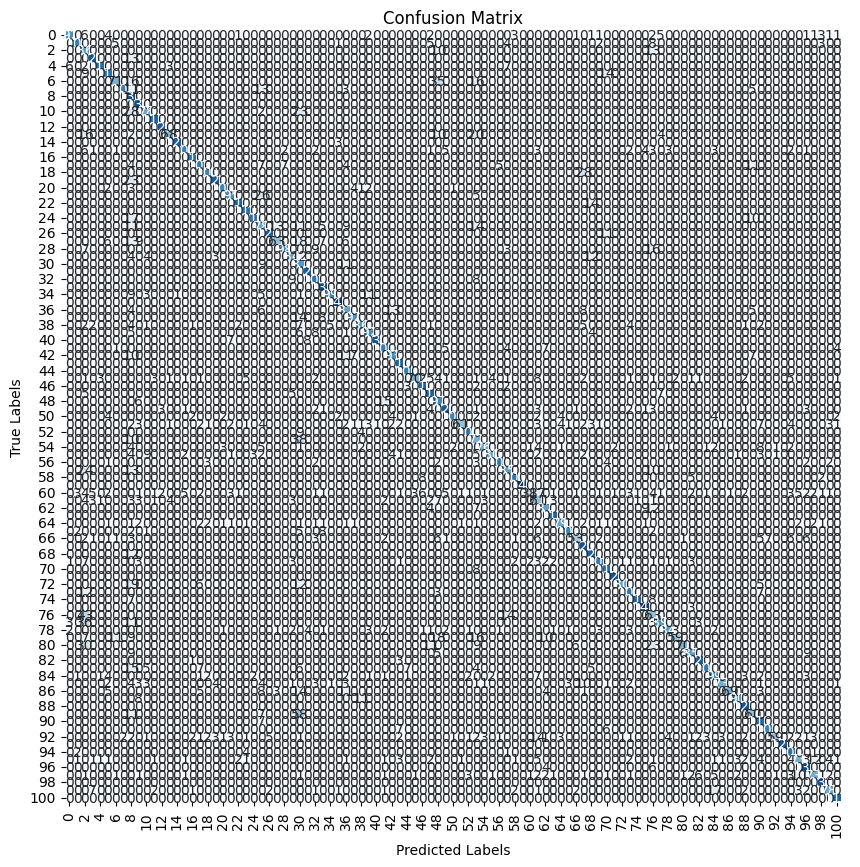

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True, fmt='d', cmap = 'Blues' , cbar = False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
#True positives
tp = np.diag(cm).sum()
#False positives
fp = cm.sum(axis = 0) - np.diag(cm)
#False negatives
fn = cm.sum(axis = 1) - np.diag(cm)
#calculate true negatives
total = cm.sum().sum()
tn = total - tp - fp.sum() - fn.sum()

print('True positives (TP): ', tp  )
print('False positives (FP): ',fp.sum())
print('False negatives (FN): ', fn.sum())
print('True negatives (TN) : ', tn)

True positives (TP):  10050
False positives (FP):  2757
False negatives (FN):  2757
True negatives (TN) :  -2757


In [28]:
joblib.dump(model , 'KTU_model.joblib')
print('Model saved again')

Model saved again


# Saving the model and the Vectorizer

In [29]:
joblib.dump(model , 'KTU_model.joblib')
joblib.dump(vectorizer, 'KTU_vectorizer.joblib')
print('model and vectorizer saved')

model and vectorizer saved


In [30]:
#Testing the saved models
nb_classifier = joblib.load('KTU_model.joblib')
vect2 = joblib.load('KTU_vectorizer.joblib')
X = vect2.transform(balanced_df['pure_text'])
X = pd.DataFrame(X.toarray().astype(np.float32), columns = vect2.get_feature_names_out())
X.head()

y = balanced_df['Account']
X_train, X_test, y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
new_prediction = nb_classifier.predict(X_test)
print(len(y_test))
print(len(new_prediction))

12807
12807


In [31]:
accuracy = accuracy_score(y_test, new_prediction)
print(accuracy)

0.7847271023658936


In [38]:
conf_matrix = confusion_matrix(y_test , new_prediction)

class_index = ' Rufaro'
tp = confusion_matrix[class_index , class_index]
fp = np.sum(confusion_matrix[:, class_index]) - tp
fn = np.sum(confusion_matrix[class_index,:]) - tp
tn = np.sum(confusion_matrix) - (tp + fp +fn)
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')


TypeError: 'function' object is not subscriptable

In [ ]:
data = vect2.transform('yo have you seen whitebeard')
answer = nb_classifier.predict(data)
print(answer)

In [ ]:
# Feature extraction and assessment of current model 
X = balanced_df[['pure_text','voc_rich','avg_sent_length','avg_wrd_length']]
y = balanced_df[['Account']] 

X_train, X_test , y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))